---
author:
- 'Adrian E. Feiguin', modified by Tom Kelley

title: 'Computational Physics'
...

Ordinary differential equations
=========================================

Let’s consider a simple 1st order equation: 
$$\frac{dy}{dx}=f(x,y)$$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

Euler’s method
--------------

Suppose that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: $$\begin{eqnarray}
&& dx \approx \Delta x &=&x_1-x_0, \\
&& dy \approx \Delta y &=&y_1-y_0,\end{eqnarray}$$ with
$y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:
$$\frac{\Delta y}{\Delta x}=f(x,y)$$ or 
$$\Delta y = f(x,y)\Delta x$$
and approximate the value of $y_1$ as
$$y_1=y_0+f(x_0,y_0)(x_1-x_0)$$ We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as
$$y_{2}=y_1+f(x_1,y_1)\Delta x,$$ or in the general case:
$$y_{n+1}=y_n+f(x_n,y_n)\Delta x$$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. The “local error” calculating $x_1$ is then
$O(\Delta x^2)$. If we use the method $N$ times to calculate $N$
consecutive points, the propagated “global” error will be
$NO(\Delta x^2)\approx O(\Delta 
x)$. This error decreases linearly with decreasing step, so we need to
halve the step size to reduce the error in half. The numerical work for
each step consists of a single evaluation of $f$.

### Exercise 1: Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $$\frac{dT}{dt}=-r(T-T_s),$$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Write a program to calculate the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Plot the results for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compare with exact (analytical)
results.

In [33]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [34]:
T = T0
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    #print (i,i*dt, T)
    # we can also do t = t - r*(t-ts)*dt, it would save some memory and processing time.
    

Let's try plotting the results. We first need to import the required libraries and methods

In [35]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot 

Next, we create numpy arrays to store the (x,y) values 

In [36]:
my_time = np.zeros(nsteps)
my_temp = np.zeros(nsteps)

We have to re write the loop to store the values in the arrays. Remember that numpy arrays start from 0.

In [37]:
T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = T - r*(T-Ts)*dt
    my_time[i] = i*dt
    my_temp[i] = T
    

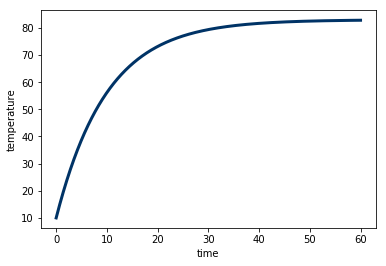

In [38]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

We could have saved effort by defining

In [39]:
my_time = np.linspace(0.,tmax,nsteps)

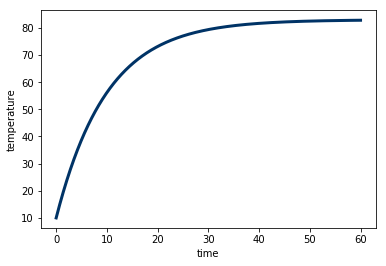

In [40]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

Alternatively, and in order to re use code in future problems, we could have created a function.

In [41]:
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx

In [42]:
T = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T


Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is a an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="http://www.secnetix.de/olli/Python/lambda_functions.hawk">here</a>).

In [43]:
euler = lambda y, f, dx: y + f*dx 

Now, let's study the effects of different time steps on the convergence:

time step=1.00 , T(t=10)=57.546
time step=0.50 , T(t=10)=56.831
time step=0.25 , T(t=10)=48.844
time step=0.12 , T(t=10)=38.863


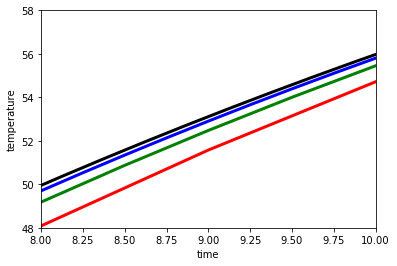

In [44]:
timearray=np.zeros(4)
Tarray=np.zeros(4)
dt = 1.
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(1,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
    print('time step=%.2f , T(t=10)=%.3f' % (dt,my_temp[10*(j+1)]))  
    Tarray[j]=my_temp[10*(j+1)]
    timearray[j]=dt
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3)
    dt = dt/2.

pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.xlim(8,10)
pyplot.ylim(48,58);


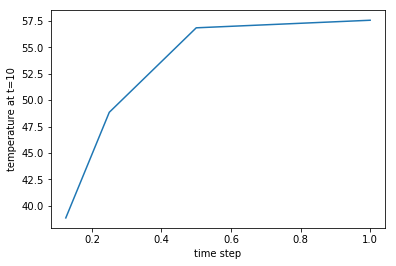

In [45]:
pyplot.plot(timearray,Tarray)
pyplot.xlabel('time step');
pyplot.ylabel('temperature at t=10');

### Challenge 2.1

To properly study convergence, one possibility it so look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 

Higher order: Taylor’s series
-----------------------------

We can go a step beyond Euler’s method keeping up to second order terms
in the expansion around $x_0$. Doing so we obtain
$$y(x+\Delta x)=y(x)+y'(x)\Delta x+\frac{1}{2}y''(x)(\Delta x)^2+O(\Delta 
x^3)
$$ from the ODE we get $$\begin{eqnarray}
y'(x)&=&f(x,y), \\
y''(x)&=&\frac{df}{dx}=\frac{\partial f}{\partial x}+\frac{\partial 
f}{\partial y}\frac{dy}{dx}=\frac{\partial f}{\partial 
x}+\frac{\partial f}{\partial y} f \end{eqnarray}$$

Substituting in the Taylor expansion we obtain

$$y_{n+1}=y_n+f\Delta x+\frac{1}{2}(\Delta x)^2[\frac{\partial 
f}{\partial x}+f\frac{\partial f}{\partial y}]+O(\Delta x^3),$$

where all the functions and derivatives are evaluated in $(x_n,y_n)$.

Multistep or Predictor-Corrector methods
----------------------------------------

We can achieve higher accuracy by relating $y_{n+1}$ not only to $y_n$,
but also to points further in the past $y_{n-1},y_{n-2},...$ To derive
such formulas we can formally integrate exactly the equation of motion to obtain:
$$y_{n+1}=y_n+\int_{x_n}^{x_{n+1}}f(x,y)dx$$

The problem is that we don’t know $f(x,y)$ over the interval
$(x_n,x_{n+1})$. However, we can use the values of $y$ at $x_n$ and
$x_{n-1}$ to provide a linear extrapolation:
$$f=\frac{(x-x_{n-1})}{\Delta x}f_n-\frac{(x-x_n)}{\Delta x} 
f_{n-1}+O(\Delta x^2),$$ with $f_n=f(x_n,y_n)$. Inserting into
the integral we obtain
$$y_{n+1}=y_n+\Delta x(\frac{3}{2}f_n-\frac{1}{2}f_{n-1})+O(\Delta x^3)$$
Note that the value of $y_0$ is not sufficient information to get this
algorithm started. The value of $y_1$ has to be obtained first by some
other procedure, like the ones described previously. This means that the
method is not **"self starting"**.

Runge-Kutta methods
-------------------

### 2nd order Runge-Kutta

Euler’s method rests on the idea that the slope at one point can be used
to extrapolate to the next. A plausible idea to make a better estimate
of the slope is to extrapolate to a point halfway across the interval,
and then to use the derivative at this point to extrapolate across the
whole interval. Thus,

$$\begin{eqnarray}
k&=&\Delta x f(x_n,y_x), \\
y_{n+1}&=&y_n+\Delta x f(x+\Delta x/2, y_n+k/2) + O(\Delta 
x^3).\end{eqnarray}$$

It has the same accuracy as the Taylor series. It requires
the evaluation of $f$ twice for each step.

### 4th order Runge-Kutta

Similar ideas can be used to derive a 3rd or 4th order Runge-Kutta
method. It has been found by experience that the best balance between
accuracy and computational effort is given by a fourth-order algorithm.
Such a method would require evaluating $f$ four times at each step, with
a local accuracy of $O(\Delta x^5)$. It can be written as follows:
$$\begin{eqnarray}
 k_1&=&\Delta x f(x_n,y_n), \\
 k_2&=&\Delta x f(x_n+\Delta x/2,y_n+k_1/2), \\
 k_3&=&\Delta x f(x_n+\Delta x/2,y_n+k_2/2), \\
 k_4&=&\Delta x f(x_n+\Delta x,y_n+k_3), \\
 y_{n+1}&=&y_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4)+O(\Delta x^5).\end{eqnarray}$$

Runge-Kutta method are self-staring, meaning that they can be used to
obtain the first few iterations for a non self-starting algorithm.

### Challenge 2.2

Repeat the calculation in Challenge 2.1 using 4th order Runge-Kutta

In [47]:
import diffeq
from diffeq import rk4

timearray=np.zeros(4)
Tarray=np.zeros(4)
dt = 1.
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(1,nsteps):
        T = rk4(-r*(T-Ts),0,tmax, nsteps)
        my_temp[i] = T
    print('time step=%.2f , T(t=10)=%.3f' % (dt,my_temp[10*(j+1)]))  
    Tarray[j]=my_temp[10*(j+1)]
    timearray[j]=dt
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3)
    dt = dt/2.

pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.xlim(8,10)
pyplot.ylim(48,58);



NameError: name 'arange' is not defined